In [1]:
import numpy as np
import pandas as pd

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
train_data_file="./train.csv"
test_data_file="./test.csv"

train_data = pd.read_csv(train_data_file)  #读取训练集
test_data = pd.read_csv(test_data_file)    #读取测试集

target=train_data['isDefault']             #label
train_data=train_data.drop(['isDefault'],axis=1)

In [4]:
data=pd.concat([train_data,test_data])  #合并数据
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 199999
Data columns (total 46 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1000000 non-null  int64  
 1   loanAmnt            1000000 non-null  float64
 2   term                1000000 non-null  int64  
 3   interestRate        1000000 non-null  float64
 4   installment         1000000 non-null  float64
 5   grade               1000000 non-null  object 
 6   subGrade            1000000 non-null  object 
 7   employmentTitle     999999 non-null   float64
 8   employmentLength    941459 non-null   object 
 9   homeOwnership       1000000 non-null  int64  
 10  annualIncome        1000000 non-null  float64
 11  verificationStatus  1000000 non-null  int64  
 12  issueDate           1000000 non-null  object 
 13  purpose             1000000 non-null  int64  
 14  postCode            999999 non-null   float64
 15  regionCode      

In [5]:
train_data.describe()

,id,loanAmnt,term,interestRate,installment,employmentTitle,homeOwnership,annualIncome,verificationStatus,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,title,policyCode,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
count,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,799999.000000,800000.000000,8.000000e+05,800000.000000,800000.000000,799999.000000,800000.000000,799761.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,799595.000000,8.000000e+05,799469.000000,800000.000000,800000.000000,800000.000000,799999.000000,800000.0,759730.000000,759730.000000,759730.000000,759730.000000,766761.000000,759730.000000,759730.000000,759730.000000,759729.000000,759730.000000,766761.000000,730248.000000,759730.000000,759730.000000,759730.000000
mean,399999.500000,14416.818875,3.482745,13.238391,437.947723,72005.351714,0.614213,7.613391e+04,1.009683,1.745982,258.535648,16.385758,18.284557,0.318239,696.204081,700.204226,11.598020,0.214915,0.134163,1.622871e+04,51.790734,24.998861,0.416953,0.019267,1754.113589,1.0,0.511932,3.642330,5.642648,5.642648,4.735641,8.107937,8.575994,8.282953,14.622488,5.592345,11.643896,0.000815,0.003384,0.089366,2.178606
std,230940.252015,8716.086178,0.855832,4.765757,261.460393,106585.640204,0.675749,6.894751e+04,0.782716,2.367453,200.037446,11.036679,11.150155,0.880325,31.865995,31.866674,5.475286,0.606467,0.377471,2.245802e+04,24.516126,11.999201,0.493055,0.137464,7941.474040,0.0,1.333266,2.246825,3.302810,3.302810,2.949969,4.799210,7.400536,4.561689,8.124610,3.216184,5.484104,0.030075,0.062041,0.509069,1.844377
min,0.000000,500.000000,3.000000,5.310000,15.690000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,630.000000,634.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,199999.750000,8000.000000,3.000000,9.750000,248.450000,427.000000,0.000000,4.560000e+04,0.000000,0.000000,103.000000,8.000000,11.790000,0.000000,670.000000,674.000000,8.000000,0.000000,0.000000,5.944000e+03,33.400000,16.000000,0.000000,0.000000,0.000000,1.0,0.000000,2.000000,3.000000,3.000000,3.000000,5.000000,4.000000,5.000000,9.000000,3.000000,8.000000,0.000000,0.000000,0.000000,1.000000
50%,399999.500000,12000.000000,3.000000,12.740000,375.135000,7755.000000,1.000000,6.500000e+04,1.000000,0.000000,203.000000,14.000000,17.610000,0.000000,690.000000,694.000000,11.000000,0.000000,0.000000,1.113200e+04,52.100000,23.000000,0.000000,0.000000,1.000000,1.0,0.000000,3.000000,5.000000,5.000000,4.000000,7.000000,7.000000,7.000000,13.000000,5.000000,11.000000,0.000000,0.000000,0.000000,2.000000
75%,599999.250000,20000.000000,3.000000,15.990000,580.710000,117663.500000,1.000000,9.000000e+04,2.000000,4.000000,395.000000,22.000000,24.060000,0.000000,710.000000,714.000000,14.000000,0.000000,0.000000,1.973400e+04,70.700000,32.000000,1.000000,0.000000,5.000000,1.0,0.000000,5.000000,7.000000,7.000000,6.000000,11.000000,11.000000,10.000000,19.000000,7.000000,14.000000,0.000000,0.000000,0.000000,3.000000
max,799999.000000,40000.000000,5.000000,30.990000,1715.420000,378351.000000,5.000000,1.099920e+07,2.000000,13.000000,940.000000,50.000000,999.000000,39.000000,845.000000,850.000000,86.000000,86.000000,12.000000,2.904836e+06,892.300000,162.000000,1.000000,1.000000,61680.000000,1.0,51.000000,33.000000,63.000000,63.000000,49.000000,70.000000,132.000000,79.000000,128.000000,45.000000,82.000000,4.000000,4.000000,39.000000,30.000000


In [6]:
data.isnull().sum() #查看缺失值

id                        0
loanAmnt                  0
term                      0
interestRate              0
installment               0
grade                     0
subGrade                  0
employmentTitle           1
employmentLength      58541
homeOwnership             0
annualIncome              0
verificationStatus        0
issueDate                 0
purpose                   0
postCode                  1
regionCode                0
dti                     300
delinquency_2years        0
ficoRangeLow              0
ficoRangeHigh             0
openAcc                   0
pubRec                    0
pubRecBankruptcies      521
revolBal                  0
revolUtil               658
totalAcc                  0
initialListStatus         0
applicationType           0
earliesCreditLine         0
title                     1
policyCode                0
n0                    50381
n1                    50381
n2                    50381
n3                    50381
n4                  

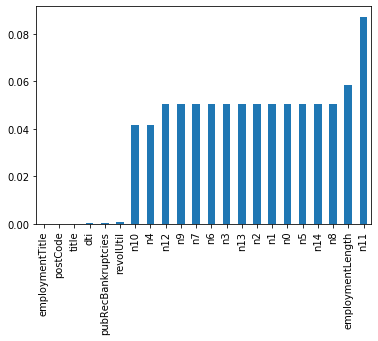

In [7]:
# nan可视化
missing = train_data.isnull().sum()/len(train_data)
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [8]:
data.head()

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,issueDate,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,earliesCreditLine,title,policyCode,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,0,35000.0,5,19.52,917.97,E,E2,320.0,2 years,2,110000.0,2,2014-07-01,1,137.0,32,17.05,0.0,730.0,734.0,7.0,0.0,0.0,24178.0,48.9,27.0,0,0,Aug-2001,1.0,1.0,0.0,2.0,2.0,2.0,4.0,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0
1,1,18000.0,5,18.49,461.90,D,D2,219843.0,5 years,0,46000.0,2,2012-08-01,0,156.0,18,27.83,0.0,700.0,704.0,13.0,0.0,0.0,15096.0,38.9,18.0,1,0,May-2002,1723.0,1.0,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
2,2,12000.0,5,16.99,298.17,D,D3,31698.0,8 years,0,74000.0,2,2015-10-01,0,337.0,14,22.77,0.0,675.0,679.0,11.0,0.0,0.0,4606.0,51.8,27.0,0,0,May-2006,0.0,1.0,0.0,0.0,3.0,3.0,0.0,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0
3,3,11000.0,3,7.26,340.96,A,A4,46854.0,10+ years,1,118000.0,1,2015-08-01,4,148.0,11,17.21,0.0,685.0,689.0,9.0,0.0,0.0,9948.0,52.6,28.0,1,0,May-1999,4.0,1.0,6.0,4.0,6.0,6.0,4.0,16.0,4.0,7.0,21.0,6.0,9.0,0.0,0.0,0.0,1.0
4,4,3000.0,3,12.99,101.07,C,C2,54.0,NaN,1,29000.0,2,2016-03-01,10,301.0,21,32.16,0.0,690.0,694.0,12.0,0.0,0.0,2942.0,32.0,27.0,0,0,Aug-1977,11.0,1.0,1.0,2.0,7.0,7.0,2.0,4.0,9.0,10.0,15.0,7.0,12.0,0.0,0.0,0.0,4.0


In [9]:
# 数值特征
numerical_fea = list(train_data.select_dtypes(exclude=['object']).columns)
# 分类型特征
category_fea = list(filter(lambda x: x not in numerical_fea,list(train_data.columns)))

In [10]:
numerical_fea

['id',
 'loanAmnt',
 'term',
 'interestRate',
 'installment',
 'employmentTitle',
 'homeOwnership',
 'annualIncome',
 'verificationStatus',
 'purpose',
 'postCode',
 'regionCode',
 'dti',
 'delinquency_2years',
 'ficoRangeLow',
 'ficoRangeHigh',
 'openAcc',
 'pubRec',
 'pubRecBankruptcies',
 'revolBal',
 'revolUtil',
 'totalAcc',
 'initialListStatus',
 'applicationType',
 'title',
 'policyCode',
 'n0',
 'n1',
 'n2',
 'n3',
 'n4',
 'n5',
 'n6',
 'n7',
 'n8',
 'n9',
 'n10',
 'n11',
 'n12',
 'n13',
 'n14']

In [11]:
category_fea

['grade', 'subGrade', 'employmentLength', 'issueDate', 'earliesCreditLine']

In [12]:
# 连续型变量
serial_feature = []
# 离散型变量
discrete_feature = []
# 单值变量
unique_feature = []

for fea in numerical_fea:
    temp = train_data[fea].nunique()# 返回的是唯一值的个数
    if temp == 1:
        unique_feature.append(fea)
     # 自定义变量的值的取值个数小于10就为离散型变量    
    elif temp <= 10:
        discrete_feature.append(fea)
    else:
        serial_feature.append(fea)

In [13]:
serial_feature

['id',
 'loanAmnt',
 'interestRate',
 'installment',
 'employmentTitle',
 'annualIncome',
 'purpose',
 'postCode',
 'regionCode',
 'dti',
 'delinquency_2years',
 'ficoRangeLow',
 'ficoRangeHigh',
 'openAcc',
 'pubRec',
 'pubRecBankruptcies',
 'revolBal',
 'revolUtil',
 'totalAcc',
 'title',
 'n0',
 'n1',
 'n2',
 'n3',
 'n4',
 'n5',
 'n6',
 'n7',
 'n8',
 'n9',
 'n10',
 'n13',
 'n14']

In [14]:
discrete_feature

['term',
 'homeOwnership',
 'verificationStatus',
 'initialListStatus',
 'applicationType',
 'n11',
 'n12']

In [15]:
unique_feature

['policyCode']

In [16]:
# 连续特征归一化
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
for col in serial_feature:
    train_data[col] = scaler.fit_transform(train_data[col].values.reshape(-1, 1))

In [17]:
train_data.head()

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,issueDate,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,earliesCreditLine,title,policyCode,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,0.000000,0.873418,5,0.553349,0.530837,E,E2,0.000846,2 years,2,0.010001,2,2014-07-01,0.076923,0.145745,0.64,0.01805,0.0,0.465116,0.462963,0.081395,0.0,0.0,0.008323,0.054802,0.15625,0,0,Aug-2001,0.000016,1.0,0.000000,0.060606,0.031746,0.031746,0.081633,0.128571,0.060606,0.050633,0.086614,0.044444,0.085366,0.0,0.0,0.0,0.066667
1,0.000001,0.443038,5,0.513240,0.262518,D,D2,0.581056,5 years,0,0.004182,2,2012-08-01,0.000000,0.165957,0.36,0.02883,0.0,0.325581,0.324074,0.151163,0.0,0.0,0.005197,0.043595,0.10000,1,0,May-2002,0.027935,1.0,NaN,NaN,NaN,NaN,0.204082,NaN,NaN,NaN,NaN,NaN,0.158537,NaN,NaN,NaN,NaN
2,0.000003,0.291139,5,0.454829,0.166191,D,D3,0.083779,8 years,0,0.006728,2,2015-10-01,0.000000,0.358511,0.28,0.02377,0.0,0.209302,0.208333,0.127907,0.0,0.0,0.001586,0.058052,0.15625,0,0,May-2006,0.000000,1.0,0.000000,0.000000,0.047619,0.047619,0.000000,0.000000,0.159091,0.050633,0.031496,0.066667,0.134146,0.0,0.0,0.0,0.133333
3,0.000004,0.265823,3,0.075935,0.191366,A,A4,0.123837,10+ years,1,0.010728,1,2015-08-01,0.307692,0.157447,0.22,0.01821,0.0,0.255814,0.254630,0.104651,0.0,0.0,0.003425,0.058949,0.16250,1,0,May-1999,0.000065,1.0,0.117647,0.121212,0.095238,0.095238,0.081633,0.228571,0.030303,0.088608,0.157480,0.133333,0.109756,0.0,0.0,0.0,0.033333
4,0.000005,0.063291,3,0.299065,0.050232,C,C2,0.000143,NaN,1,0.002637,2,2016-03-01,0.769231,0.320213,0.42,0.03316,0.0,0.279070,0.277778,0.139535,0.0,0.0,0.001013,0.035862,0.15625,0,0,Aug-1977,0.000178,1.0,0.019608,0.060606,0.111111,0.111111,0.040816,0.057143,0.068182,0.126582,0.110236,0.155556,0.146341,0.0,0.0,0.0,0.133333


In [18]:
# 数值型特征（连续型和离散型）用中位数填补
# 训练集
train_data[numerical_fea] = train_data[numerical_fea].fillna(train_data[numerical_fea].median())
# 测试集
test_data[numerical_fea] = test_data[numerical_fea].fillna(test_data[numerical_fea].median())

In [19]:
# 分类型特征用众数填补
# 训练集
train_data[category_fea] = train_data[category_fea].fillna(train_data[category_fea].mode())
# 测试集
test_data[category_fea] = test_data[category_fea].fillna(test_data[category_fea].mode())

In [20]:
train_data.isnull().sum()

id                        0
loanAmnt                  0
term                      0
interestRate              0
installment               0
grade                     0
subGrade                  0
employmentTitle           0
employmentLength      46799
homeOwnership             0
annualIncome              0
verificationStatus        0
issueDate                 0
purpose                   0
postCode                  0
regionCode                0
dti                       0
delinquency_2years        0
ficoRangeLow              0
ficoRangeHigh             0
openAcc                   0
pubRec                    0
pubRecBankruptcies        0
revolBal                  0
revolUtil                 0
totalAcc                  0
initialListStatus         0
applicationType           0
earliesCreditLine         0
title                     0
policyCode                0
n0                        0
n1                        0
n2                        0
n3                        0
n4                  

In [21]:
# 类别型特征处理
for data in [train_data, test_data]:
    data['employmentLength'] = data['employmentLength'].map(
        {'1 year': 1, '2 years': 2, '3 years': 3, '4 years': 4, '5 years': 5, '6 years': 6, '7 years': 7, '8 years': 8,
         '9 years': 9, '10+ years': 10, '< 1 year': 0})
    
train_data.head()

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,issueDate,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,earliesCreditLine,title,policyCode,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,0.000000,0.873418,5,0.553349,0.530837,E,E2,0.000846,2.0,2,0.010001,2,2014-07-01,0.076923,0.145745,0.64,0.01805,0.0,0.465116,0.462963,0.081395,0.0,0.0,0.008323,0.054802,0.15625,0,0,Aug-2001,0.000016,1.0,0.000000,0.060606,0.031746,0.031746,0.081633,0.128571,0.060606,0.050633,0.086614,0.044444,0.085366,0.0,0.0,0.0,0.066667
1,0.000001,0.443038,5,0.513240,0.262518,D,D2,0.581056,5.0,0,0.004182,2,2012-08-01,0.000000,0.165957,0.36,0.02883,0.0,0.325581,0.324074,0.151163,0.0,0.0,0.005197,0.043595,0.10000,1,0,May-2002,0.027935,1.0,0.000000,0.090909,0.079365,0.079365,0.204082,0.100000,0.053030,0.088608,0.094488,0.111111,0.158537,0.0,0.0,0.0,0.066667
2,0.000003,0.291139,5,0.454829,0.166191,D,D3,0.083779,8.0,0,0.006728,2,2015-10-01,0.000000,0.358511,0.28,0.02377,0.0,0.209302,0.208333,0.127907,0.0,0.0,0.001586,0.058052,0.15625,0,0,May-2006,0.000000,1.0,0.000000,0.000000,0.047619,0.047619,0.000000,0.000000,0.159091,0.050633,0.031496,0.066667,0.134146,0.0,0.0,0.0,0.133333
3,0.000004,0.265823,3,0.075935,0.191366,A,A4,0.123837,10.0,1,0.010728,1,2015-08-01,0.307692,0.157447,0.22,0.01821,0.0,0.255814,0.254630,0.104651,0.0,0.0,0.003425,0.058949,0.16250,1,0,May-1999,0.000065,1.0,0.117647,0.121212,0.095238,0.095238,0.081633,0.228571,0.030303,0.088608,0.157480,0.133333,0.109756,0.0,0.0,0.0,0.033333
4,0.000005,0.063291,3,0.299065,0.050232,C,C2,0.000143,NaN,1,0.002637,2,2016-03-01,0.769231,0.320213,0.42,0.03316,0.0,0.279070,0.277778,0.139535,0.0,0.0,0.001013,0.035862,0.15625,0,0,Aug-1977,0.000178,1.0,0.019608,0.060606,0.111111,0.111111,0.040816,0.057143,0.068182,0.126582,0.110236,0.155556,0.146341,0.0,0.0,0.0,0.133333


In [22]:
train_data.head()

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,issueDate,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,earliesCreditLine,title,policyCode,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,0.000000,0.873418,5,0.553349,0.530837,E,E2,0.000846,2.0,2,0.010001,2,2014-07-01,0.076923,0.145745,0.64,0.01805,0.0,0.465116,0.462963,0.081395,0.0,0.0,0.008323,0.054802,0.15625,0,0,Aug-2001,0.000016,1.0,0.000000,0.060606,0.031746,0.031746,0.081633,0.128571,0.060606,0.050633,0.086614,0.044444,0.085366,0.0,0.0,0.0,0.066667
1,0.000001,0.443038,5,0.513240,0.262518,D,D2,0.581056,5.0,0,0.004182,2,2012-08-01,0.000000,0.165957,0.36,0.02883,0.0,0.325581,0.324074,0.151163,0.0,0.0,0.005197,0.043595,0.10000,1,0,May-2002,0.027935,1.0,0.000000,0.090909,0.079365,0.079365,0.204082,0.100000,0.053030,0.088608,0.094488,0.111111,0.158537,0.0,0.0,0.0,0.066667
2,0.000003,0.291139,5,0.454829,0.166191,D,D3,0.083779,8.0,0,0.006728,2,2015-10-01,0.000000,0.358511,0.28,0.02377,0.0,0.209302,0.208333,0.127907,0.0,0.0,0.001586,0.058052,0.15625,0,0,May-2006,0.000000,1.0,0.000000,0.000000,0.047619,0.047619,0.000000,0.000000,0.159091,0.050633,0.031496,0.066667,0.134146,0.0,0.0,0.0,0.133333
3,0.000004,0.265823,3,0.075935,0.191366,A,A4,0.123837,10.0,1,0.010728,1,2015-08-01,0.307692,0.157447,0.22,0.01821,0.0,0.255814,0.254630,0.104651,0.0,0.0,0.003425,0.058949,0.16250,1,0,May-1999,0.000065,1.0,0.117647,0.121212,0.095238,0.095238,0.081633,0.228571,0.030303,0.088608,0.157480,0.133333,0.109756,0.0,0.0,0.0,0.033333
4,0.000005,0.063291,3,0.299065,0.050232,C,C2,0.000143,NaN,1,0.002637,2,2016-03-01,0.769231,0.320213,0.42,0.03316,0.0,0.279070,0.277778,0.139535,0.0,0.0,0.001013,0.035862,0.15625,0,0,Aug-1977,0.000178,1.0,0.019608,0.060606,0.111111,0.111111,0.040816,0.057143,0.068182,0.126582,0.110236,0.155556,0.146341,0.0,0.0,0.0,0.133333


In [23]:
# employmentLength编码后用众数填补
# 训练集
train_data['employmentLength'] = train_data['employmentLength'].fillna(train_data['employmentLength'].mode()[0])
# 测试集
test_data['employmentLength'] = test_data['employmentLength'].fillna(test_data['employmentLength'].mode()[0])

In [24]:
# 类别型特征处理
for data in [train_data, test_data]:
    data['earliesCreditLine'] = data['earliesCreditLine'].apply(lambda s: int(s[-4:]))

data.head()

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,issueDate,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,earliesCreditLine,title,policyCode,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,800000,14000.0,3,10.99,458.28,B,B3,7027.0,10.0,0,80000.0,0,2014-07-01,0,163.0,21,10.56,1.0,715.0,719.0,17.0,0.0,0.0,9846.0,30.7,29.0,0,0,1974,0.0,1.0,1.0,4.0,6.0,6.0,6.0,8.0,4.0,15.0,19.0,6.0,17.0,0.0,0.0,1.0,3.0
1,800001,20000.0,5,14.65,472.14,C,C5,60426.0,10.0,0,50000.0,0,2015-07-01,2,235.0,8,21.40,2.0,670.0,674.0,5.0,0.0,0.0,8946.0,56.6,14.0,0,0,2001,5.0,1.0,2.0,1.0,3.0,3.0,1.0,1.0,3.0,3.0,9.0,3.0,5.0,0.0,0.0,2.0,2.0
2,800002,12000.0,3,19.99,445.91,D,D4,23547.0,2.0,1,60000.0,2,2016-10-01,0,526.0,20,33.50,0.0,710.0,714.0,12.0,0.0,0.0,970.0,17.6,43.0,1,0,2006,0.0,1.0,0.0,1.0,4.0,4.0,1.0,1.0,36.0,5.0,6.0,4.0,12.0,0.0,0.0,0.0,7.0
3,800003,17500.0,5,14.31,410.02,C,C4,636.0,4.0,0,37000.0,1,2014-11-01,4,248.0,11,13.95,0.0,685.0,689.0,10.0,1.0,1.0,10249.0,52.3,18.0,0,0,2002,4.0,1.0,0.0,2.0,2.0,2.0,4.0,7.0,2.0,8.0,14.0,2.0,10.0,0.0,0.0,0.0,3.0
4,800004,35000.0,3,17.09,1249.42,D,D1,368446.0,0.0,1,80000.0,1,2017-10-01,0,115.0,8,24.97,0.0,685.0,689.0,19.0,0.0,0.0,33199.0,35.6,22.0,0,0,2000,0.0,1.0,0.0,8.0,11.0,11.0,9.0,11.0,3.0,16.0,18.0,11.0,19.0,0.0,0.0,0.0,1.0


In [25]:
# 类别型特征处理
for data in [train_data, test_data]:
    #issuedata 时间对分析意义不大 删除
    data.drop('issueDate',axis=1,inplace=True)
data.head()

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,earliesCreditLine,title,policyCode,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,800000,14000.0,3,10.99,458.28,B,B3,7027.0,10.0,0,80000.0,0,0,163.0,21,10.56,1.0,715.0,719.0,17.0,0.0,0.0,9846.0,30.7,29.0,0,0,1974,0.0,1.0,1.0,4.0,6.0,6.0,6.0,8.0,4.0,15.0,19.0,6.0,17.0,0.0,0.0,1.0,3.0
1,800001,20000.0,5,14.65,472.14,C,C5,60426.0,10.0,0,50000.0,0,2,235.0,8,21.40,2.0,670.0,674.0,5.0,0.0,0.0,8946.0,56.6,14.0,0,0,2001,5.0,1.0,2.0,1.0,3.0,3.0,1.0,1.0,3.0,3.0,9.0,3.0,5.0,0.0,0.0,2.0,2.0
2,800002,12000.0,3,19.99,445.91,D,D4,23547.0,2.0,1,60000.0,2,0,526.0,20,33.50,0.0,710.0,714.0,12.0,0.0,0.0,970.0,17.6,43.0,1,0,2006,0.0,1.0,0.0,1.0,4.0,4.0,1.0,1.0,36.0,5.0,6.0,4.0,12.0,0.0,0.0,0.0,7.0
3,800003,17500.0,5,14.31,410.02,C,C4,636.0,4.0,0,37000.0,1,4,248.0,11,13.95,0.0,685.0,689.0,10.0,1.0,1.0,10249.0,52.3,18.0,0,0,2002,4.0,1.0,0.0,2.0,2.0,2.0,4.0,7.0,2.0,8.0,14.0,2.0,10.0,0.0,0.0,0.0,3.0
4,800004,35000.0,3,17.09,1249.42,D,D1,368446.0,0.0,1,80000.0,1,0,115.0,8,24.97,0.0,685.0,689.0,19.0,0.0,0.0,33199.0,35.6,22.0,0,0,2000,0.0,1.0,0.0,8.0,11.0,11.0,9.0,11.0,3.0,16.0,18.0,11.0,19.0,0.0,0.0,0.0,1.0


In [26]:
# 类别型特征处理
from sklearn.preprocessing import LabelEncoder

for data in [train_data, test_data]:
    le = LabelEncoder()
    data['grade']=le.fit_transform(data['grade'])
    data['subGrade']=le.fit_transform(data['subGrade'])

data.head()

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,earliesCreditLine,title,policyCode,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,800000,14000.0,3,10.99,458.28,1,7,7027.0,10.0,0,80000.0,0,0,163.0,21,10.56,1.0,715.0,719.0,17.0,0.0,0.0,9846.0,30.7,29.0,0,0,1974,0.0,1.0,1.0,4.0,6.0,6.0,6.0,8.0,4.0,15.0,19.0,6.0,17.0,0.0,0.0,1.0,3.0
1,800001,20000.0,5,14.65,472.14,2,14,60426.0,10.0,0,50000.0,0,2,235.0,8,21.40,2.0,670.0,674.0,5.0,0.0,0.0,8946.0,56.6,14.0,0,0,2001,5.0,1.0,2.0,1.0,3.0,3.0,1.0,1.0,3.0,3.0,9.0,3.0,5.0,0.0,0.0,2.0,2.0
2,800002,12000.0,3,19.99,445.91,3,18,23547.0,2.0,1,60000.0,2,0,526.0,20,33.50,0.0,710.0,714.0,12.0,0.0,0.0,970.0,17.6,43.0,1,0,2006,0.0,1.0,0.0,1.0,4.0,4.0,1.0,1.0,36.0,5.0,6.0,4.0,12.0,0.0,0.0,0.0,7.0
3,800003,17500.0,5,14.31,410.02,2,13,636.0,4.0,0,37000.0,1,4,248.0,11,13.95,0.0,685.0,689.0,10.0,1.0,1.0,10249.0,52.3,18.0,0,0,2002,4.0,1.0,0.0,2.0,2.0,2.0,4.0,7.0,2.0,8.0,14.0,2.0,10.0,0.0,0.0,0.0,3.0
4,800004,35000.0,3,17.09,1249.42,3,15,368446.0,0.0,1,80000.0,1,0,115.0,8,24.97,0.0,685.0,689.0,19.0,0.0,0.0,33199.0,35.6,22.0,0,0,2000,0.0,1.0,0.0,8.0,11.0,11.0,9.0,11.0,3.0,16.0,18.0,11.0,19.0,0.0,0.0,0.0,1.0


In [27]:
def find_outliers_by_3segama(data,fea):
    data_std = np.std(data[fea])
    data_mean = np.mean(data[fea])
    outliers_cut_off = data_std * 3
    lower_rule = data_mean - outliers_cut_off
    upper_rule = data_mean + outliers_cut_off
    data[fea+'_outliers'] = data[fea].apply(lambda x:str('异常值') if x > upper_rule or x < lower_rule else '正常值')
    return data

In [28]:
for fea in numerical_fea:
    train_data = find_outliers_by_3segama(train_data,fea)
    print(fea+'_outliers',sum(train_data[fea+'_outliers']=='异常值'))

id_outliers 0
loanAmnt_outliers 0
term_outliers 0
interestRate_outliers 5741
installment_outliers 7954
employmentTitle_outliers 0
homeOwnership_outliers 299
annualIncome_outliers 6027
verificationStatus_outliers 0
purpose_outliers 16997
postCode_outliers 1069
regionCode_outliers 6
dti_outliers 1560
delinquency_2years_outliers 21755
ficoRangeLow_outliers 11739
ficoRangeHigh_outliers 11739
openAcc_outliers 9111
pubRec_outliers 7529
pubRecBankruptcies_outliers 5880
revolBal_outliers 9999
revolUtil_outliers 52
totalAcc_outliers 8337
initialListStatus_outliers 0
applicationType_outliers 15414
title_outliers 24866
policyCode_outliers 0
n0_outliers 17227
n1_outliers 9500
n2_outliers 10933
n3_outliers 10933
n4_outliers 11340
n5_outliers 9645
n6_outliers 13994
n7_outliers 11570
n8_outliers 10375
n9_outliers 13616
n10_outliers 11021
n11_outliers 566
n12_outliers 2415
n13_outliers 11093
n14_outliers 11116


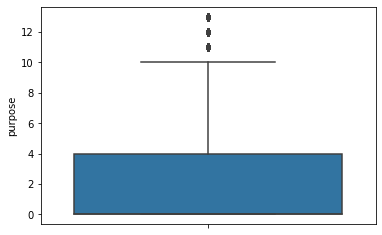

In [29]:
# 箱型图检测异常值
import seaborn as sns
sns.boxplot(y='purpose',data=data)

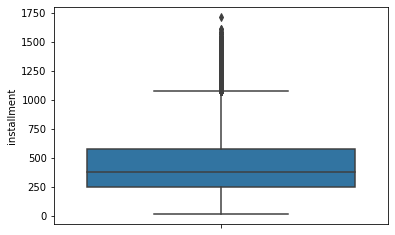

In [30]:
sns.boxplot(y='installment',data=data)

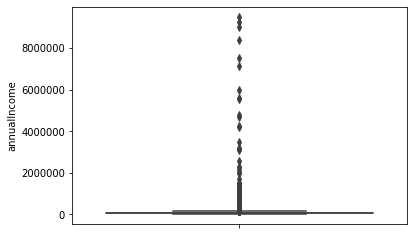

In [31]:
sns.boxplot(y='annualIncome',data=data)

In [32]:
# 删除异常值
# 删除数据前，先暂时把样本和标签合并
train_data=pd.concat([train_data,target], axis=1)

for fea in numerical_fea:
    train_data = train_data[train_data[fea+'_outliers']=='正常值']
    #train_data = train_data.reset_index(drop=True) 
    
# 分离标签和样本
target=train_data['isDefault']             #label
train_data=train_data.drop(['isDefault'],axis=1)

In [33]:
# 删除异常统计列
for fea in numerical_fea:
       train_data.drop(fea+'_outliers',axis=1,inplace=True)
        
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 612742 entries, 0 to 799999
Data columns (total 45 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  612742 non-null  float64
 1   loanAmnt            612742 non-null  float64
 2   term                612742 non-null  int64  
 3   interestRate        612742 non-null  float64
 4   installment         612742 non-null  float64
 5   grade               612742 non-null  int32  
 6   subGrade            612742 non-null  int32  
 7   employmentTitle     612742 non-null  float64
 8   employmentLength    612742 non-null  float64
 9   homeOwnership       612742 non-null  int64  
 10  annualIncome        612742 non-null  float64
 11  verificationStatus  612742 non-null  int64  
 12  purpose             612742 non-null  float64
 13  postCode            612742 non-null  float64
 14  regionCode          612742 non-null  float64
 15  dti                 612742 non-nul

In [34]:
# 求出各个特征与目标的相关系数，综合考虑排除corr小于0.01的特征
train_data.corrwith(target).sort_values()

ficoRangeLow         -0.128541
ficoRangeHigh        -0.128541
annualIncome         -0.065541
purpose              -0.032990
employmentTitle      -0.026137
totalAcc             -0.024568
title                -0.021771
n5                   -0.021715
revolBal             -0.019310
n8                   -0.011180
initialListStatus    -0.005529
n6                   -0.004452
employmentLength     -0.001461
id                    0.000227
regionCode            0.001558
postCode              0.006663
n4                    0.009364
n13                   0.010801
delinquency_2years    0.014012
n0                    0.015002
n10                   0.015907
openAcc               0.017294
pubRecBankruptcies    0.023167
n7                    0.027581
pubRec                0.028772
n1                    0.035943
earliesCreditLine     0.038076
installment           0.043117
homeOwnership         0.053502
revolUtil             0.060353
loanAmnt              0.061056
n9                    0.064747
n2      

In [35]:
corr=train_data.corrwith(target)
corr[np.abs(corr)<0.01]

id                   0.000227
employmentLength    -0.001461
postCode             0.006663
regionCode           0.001558
initialListStatus   -0.005529
n4                   0.009364
n6                  -0.004452
dtype: float64

In [36]:
# 删除一些无效特征
dropFea=['id','applicationType','policyCode','n11','n12']
for data in [train_data, test_data]:
    data.drop(dropFea,axis=1,inplace=True)

train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 612742 entries, 0 to 799999
Data columns (total 40 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   loanAmnt            612742 non-null  float64
 1   term                612742 non-null  int64  
 2   interestRate        612742 non-null  float64
 3   installment         612742 non-null  float64
 4   grade               612742 non-null  int32  
 5   subGrade            612742 non-null  int32  
 6   employmentTitle     612742 non-null  float64
 7   employmentLength    612742 non-null  float64
 8   homeOwnership       612742 non-null  int64  
 9   annualIncome        612742 non-null  float64
 10  verificationStatus  612742 non-null  int64  
 11  purpose             612742 non-null  float64
 12  postCode            612742 non-null  float64
 13  regionCode          612742 non-null  float64
 14  dti                 612742 non-null  float64
 15  delinquency_2years  612742 non-nul

In [37]:
print('数据预处理完成！')

数据预处理完成！


In [38]:
train_data.head()

,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,earliesCreditLine,title,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n13,n14
0,0.873418,5,0.553349,0.530837,4,21,0.000846,2.0,2,0.010001,2,0.076923,0.145745,0.64,0.01805,0.0,0.465116,0.462963,0.081395,0.000000,0.000000,0.008323,0.054802,0.15625,0,2001,0.000016,0.0,0.060606,0.031746,0.031746,0.081633,0.128571,0.060606,0.050633,0.086614,0.044444,0.085366,0.0,0.066667
1,0.443038,5,0.513240,0.262518,3,16,0.581056,5.0,0,0.004182,2,0.000000,0.165957,0.36,0.02883,0.0,0.325581,0.324074,0.151163,0.000000,0.000000,0.005197,0.043595,0.10000,1,2002,0.027935,0.0,0.090909,0.079365,0.079365,0.204082,0.100000,0.053030,0.088608,0.094488,0.111111,0.158537,0.0,0.066667
2,0.291139,5,0.454829,0.166191,3,17,0.083779,8.0,0,0.006728,2,0.000000,0.358511,0.28,0.02377,0.0,0.209302,0.208333,0.127907,0.000000,0.000000,0.001586,0.058052,0.15625,0,2006,0.000000,0.0,0.000000,0.047619,0.047619,0.000000,0.000000,0.159091,0.050633,0.031496,0.066667,0.134146,0.0,0.133333
6,0.039241,3,0.092679,0.028393,0,3,0.475968,9.0,0,0.003182,0,0.000000,0.550000,0.28,0.01849,0.0,0.581395,0.578704,0.139535,0.000000,0.000000,0.001071,0.009526,0.13125,0,2006,0.000000,0.0,0.030303,0.047619,0.047619,0.142857,0.157143,0.022727,0.126582,0.133858,0.066667,0.146341,0.0,0.100000
7,0.278481,3,0.376558,0.225242,2,12,0.565657,1.0,1,0.002727,2,0.000000,0.106383,0.08,0.03360,0.0,0.162791,0.162037,0.093023,0.011628,0.083333,0.004827,0.066906,0.19375,1,1994,0.000000,0.0,0.121212,0.063492,0.063492,0.081633,0.228571,0.075758,0.063291,0.157480,0.088889,0.097561,0.0,0.066667


In [39]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(train_data, target, random_state=233, test_size=0.75)
X_train, X_train_lr, Y_train, Y_train_lr = train_test_split(X_train, Y_train, random_state=233, test_size=0.2)
def GBDTLR():
    GBDT = GradientBoostingClassifier(n_estimators=100)
    GBDT.fit(X_train, Y_train)
    OHE = OneHotEncoder()
    OHE.fit(GBDT.apply(X_train)[:, :, 0])
    LR = LogisticRegression(C=0.1, penalty='l1',solver='liblinear')
    LR.fit(OHE.transform(GBDT.apply(X_train_lr)[:, :, 0]), Y_train_lr)
    Y_pred = LR.predict_proba(OHE.transform(GBDT.apply(X_test)[:, :, 0]))[:, 1]
    fpr, tpr, _ = roc_curve(Y_test, Y_pred)
    auc = roc_auc_score(Y_test, Y_pred)
    print('GradientBoosting + LogisticRegression: ', auc)
    return fpr, tpr

GradientBoosting + LogisticRegression:  0.714874224704728


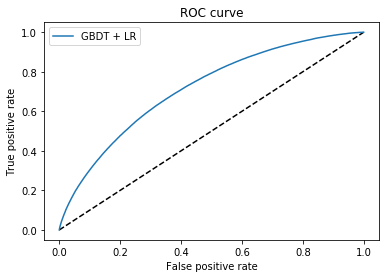

In [40]:
import matplotlib.pyplot as plt
fpr_gbdt_lr, tpr_gbdt_lr = GBDTLR()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_gbdt_lr, tpr_gbdt_lr, label='GBDT + LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')

In [41]:
train_data.reset_index(drop=True,inplace=True)
target.reset_index(drop=True,inplace=True)

In [42]:
import warnings
warnings.filterwarnings('ignore')
# 5折交叉验证
from sklearn.model_selection import KFold
folds = 5
seed = 2020
kf = KFold(n_splits=folds, shuffle=True, random_state=seed)

import lightgbm as lgb
"""使用lightgbm 5折交叉验证进行建模预测"""
cv_scores = []
X_train=train_data
y_train=target
for i, (train_index, valid_index) in enumerate(kf.split(X_train, y_train)):
    print('************************************ {} ************************************'.format(str(i+1)))
    X_train_split, y_train_split, X_val, y_val = X_train.iloc[train_index], y_train[train_index], X_train.iloc[valid_index], y_train[valid_index]
    
    train_matrix = lgb.Dataset(X_train_split, label=y_train_split)
    valid_matrix = lgb.Dataset(X_val, label=y_val)

    params = {
                'boosting_type': 'gbdt',
                'objective': 'binary',
                'learning_rate': 0.1,
                'metric': 'auc',
        
                'min_child_weight': 1e-3,
                'num_leaves': 31,
                'max_depth': -1,
                'reg_lambda': 0,
                'reg_alpha': 0,
                'feature_fraction': 1,
                'bagging_fraction': 1,
                'bagging_freq': 0,
                'seed': 2020,
                'nthread': 8,
                'silent': True,
                'verbose': -1,
    }
    
    model = lgb.train(params, train_set=train_matrix, num_boost_round=20000, valid_sets=valid_matrix, verbose_eval=1000, early_stopping_rounds=200)
    val_pred = model.predict(X_val, num_iteration=model.best_iteration)
    
    cv_scores.append(roc_auc_score(y_val, val_pred))
    print(cv_scores)

print("lgb_scotrainre_list:{}".format(cv_scores))
print("lgb_score_mean:{}".format(np.mean(cv_scores)))
print("lgb_score_std:{}".format(np.std(cv_scores)))

************************************ 1 ************************************
[LightGBM] [Warning] Unknown parameter: silent
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[478]	valid_0's auc: 0.72515
[0.7251502601484526]
************************************ 2 ************************************
[LightGBM] [Warning] Unknown parameter: silent
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[406]	valid_0's auc: 0.725728
[0.7251502601484526, 0.7257276290836684]
************************************ 3 ************************************
[LightGBM] [Warning] Unknown parameter: silent
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[367]	valid_0's auc: 0.726968
[0.7251502601484526, 0.7257276290836684, 0.7269683494319836]
************************************ 4 ************************************
[LightGBM] [Warning] Unknown parameter: silent
Train

In [43]:
import xgboost as xgb
def XGBoost():
    XGB = xgb.XGBClassifier(nthread=4, learning_rate=0.08, n_estimators=100, colsample_bytree=0.5)
    XGB.fit(X_train, y_train)
    Y_pred = XGB.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(Y_test, Y_pred)
    auc = roc_auc_score(Y_test, Y_pred)
    print('XGBoost: ', auc)
    return fpr, tpr

In [44]:
def LR():
    LR = LogisticRegression(C=0.1, penalty='l1',solver='liblinear')
    LR.fit(X_train, y_train)
    Y_pred = LR.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(Y_test, Y_pred)
    auc = roc_auc_score(Y_test, Y_pred)
    print('LogisticRegression: ', auc)
    return fpr, tpr

In [45]:
def GBDT():
    GBDT = GradientBoostingClassifier(n_estimators=100)
    GBDT.fit(X_train, y_train)
    Y_pred = GBDT.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(Y_test, Y_pred)
    auc = roc_auc_score(Y_test, Y_pred)
    print('GBDT: ', auc)
    return fpr, tpr

[16:24:49] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost:  0.7331240724172303
LogisticRegression:  0.7098473041166746
GBDT:  0.720122172473467


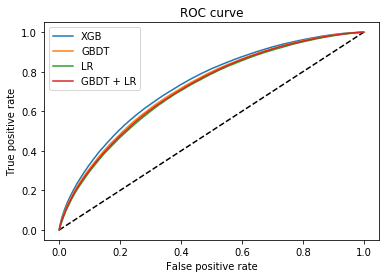

In [46]:
fpr_xgb, tpr_xgb = XGBoost()
fpr_lr, tpr_lr = LR()
fpr_gbdt, tpr_gbdt = GBDT()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_xgb, tpr_xgb, label='XGB')
plt.plot(fpr_gbdt, tpr_gbdt, label='GBDT')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.plot(fpr_gbdt_lr, tpr_gbdt_lr, label='GBDT + LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')